# Example of swift Cygnus project PY access

In [1]:
# Read Write account
OS_REGION_NAME='lnf'
OS_USER_DOMAIN_NAME='default'
OS_PROJECT_DOMAIN_NAME='default'
OS_PROJECT_NAME='cygnus-default'
OS_IDENTITY_API_VERSION='3'
OS_PASSWORD='bayRonPeOcan9Quiufvecfevesyailb7'
OS_AUTH_TYPE='password'
OS_AUTH_STRATEGY='keystone'
OS_AUTH_URL='https://keystone.cloud.infn.it:5000/v3/'
OS_USERNAME='cygnus'
OS_STORAGE_URL='https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8'

In [2]:
# Read - Only account
OS_PROJECT_NAME='anonymous'
OS_USERNAME='anonymous'
OS_PASSWORD='anonymous'
OS_AUTH_URL='https://keystone.cloud.infn.it:5000/v3/'
OS_REGION_NAME='lnf'
OS_PROJECT_DOMAIN_NAME='default'
OS_USER_DOMAIN_NAME='default'
OS_IDENTITY_API_VERSION='3'
OS_STORAGE_URL='https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8'

In [3]:
import numpy as np
import sys
import cygnus_lib as cy
#import importlib
#importlib.reload(cygnus_lib)

In [4]:
import swiftclient
from keystoneauth1 import session
from keystoneauth1.identity import v3
# https://docs.openstack.org/python-swiftclient/latest/service-api.html
_auth = v3.Password(
    user_domain_name    = OS_USER_DOMAIN_NAME,
    project_domain_name = OS_PROJECT_DOMAIN_NAME,
    project_name        = OS_PROJECT_NAME,
    username            = OS_USERNAME,
    password            = OS_PASSWORD,
    auth_url            = OS_AUTH_URL
)
_os_options={
    'region_name' : OS_REGION_NAME, 
    'object_storage_url': OS_STORAGE_URL
}
# Create session
keystone_session = session.Session(auth = _auth)

# Create swiftclient Connection
swift = swiftclient.Connection(session      = keystone_session, 
                               auth_version = OS_IDENTITY_API_VERSION,
                               os_options   = _os_options
                              )
# https://docs.openstack.org/python-swiftclient/latest/swiftclient.html#module-swiftclient.client

In [5]:
print(swift.get_auth())

('https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8', 'gAAAAABdus-WZ7vpGWa2K1qgB8Hs3MnLTXxgvQLkHlrKZsl8-2h5_oNKnXSX08D7kNnQpM8JJUVatyJ9F2GVD66C7dWsNrFEqO0weBGUBRi3pn11vd2ttCVPLR0Bkof5k19Pil7Dx8YXZCRW_IA3SdCvl6EjpZ0pbEGqaEvpZ32QucppN2o9F-4')


In [6]:
### questo pezzo di codice non funziona se si punta al  OS_STORAGE_URL ma solo 
### se si e' mazzitel e si punta a OS_AUTH_URL
# response = swift.get_account()
# account_info = response[0]
# containers = response[1]
# print ("info: %s \n\n" % account_info)
# print ("Conteiner: %s" % containers)

In [7]:
#
# list files in Cygnus conteiner
#
for data in swift.get_container("Cygnus")[1]:
#    if 'run858' in str(data):
    print ('{0}\t{1}\t{2}'.format(data['name'], data['bytes'], data['last_modified']))


Analysis	0	2019-03-19T17:44:38.987590
Analysis/PY	0	2019-03-19T17:44:54.208150
Analysis/PY/lib	0	2019-03-19T17:45:07.670500
Analysis/PY/lib/cygnus_lib.py	16737	2019-03-19T17:45:17.511190
Data	0	2018-07-18T12:55:00.230180
Data/BTF	0	2018-12-23T08:54:16.516430
Data/BTF/Data_Camera	0	2018-12-23T08:55:07.705410
Data/BTF/Data_Camera/H5	0	2018-12-23T08:55:27.857470
Data/BTF/Data_Camera/H5/Run026	0	2019-01-25T13:27:04.970970
Data/BTF/Data_Camera/H5/Run026/run026-0000.h5	16783456	2019-01-25T13:28:15.856570
Data/BTF/Data_Camera/H5/Run026/run026-0001.h5	16783456	2019-01-25T13:28:16.512290
Data/BTF/Data_Camera/H5/Run026/run026-0002.h5	16783456	2019-01-25T13:27:05.220060
Data/BTF/Data_Camera/H5/Run026/run026-0003.h5	16783456	2019-01-25T13:27:06.098660
Data/BTF/Data_Camera/H5/Run026/run026-0004.h5	16783456	2019-01-25T13:27:06.792970
Data/BTF/Data_Camera/H5/Run026/run026-0005.h5	16783456	2019-01-25T13:27:07.509840
Data/BTF/Data_Camera/H5/Run026/run026-0006.h5	16783456	2019-01-25T13:27:08.190650
Data

Data/BTF/Data_Camera/H5/Run090/run090-0000.h5	16783456	2018-12-23T09:29:54.591870
Data/BTF/Data_Camera/H5/Run090/run090-0001.h5	16783456	2018-12-23T09:25:07.784440
Data/BTF/Data_Camera/H5/Run090/run090-0002.h5	16783456	2018-12-23T09:25:07.787130
Data/BTF/Data_Camera/H5/Run090/run090-0003.h5	16783456	2018-12-23T09:25:13.418380
Data/BTF/Data_Camera/H5/Run090/run090-0004.h5	16783456	2018-12-23T09:25:13.504170
Data/BTF/Data_Camera/H5/Run090/run090-0005.h5	16783456	2018-12-23T09:25:19.275200
Data/BTF/Data_Camera/H5/Run090/run090-0006.h5	16783456	2018-12-23T09:25:19.480810
Data/BTF/Data_Camera/H5/Run090/run090-0007.h5	16783456	2018-12-23T09:25:25.576270
Data/BTF/Data_Camera/H5/Run090/run090-0008.h5	16783456	2018-12-23T09:25:25.293640
Data/BTF/Data_Camera/H5/Run090/run090-0009.h5	16783456	2018-12-23T09:25:31.060250
Data/BTF/Data_Camera/H5/Run090/run090-0010.h5	16783456	2018-12-23T09:25:31.389820
Data/BTF/Data_Camera/H5/Run090/run090-0011.h5	16783456	2018-12-23T09:25:36.878230
Data/BTF/Data_Ca

Data/FNG/Data_Camera/H5/Run810/run810-0042.h5	16783456	2018-07-19T11:36:29.458790
Data/FNG/Data_Camera/H5/Run810/run810-0043.h5	16783456	2018-07-19T11:36:29.903280
Data/FNG/Data_Camera/H5/Run810/run810-0044.h5	16783456	2018-07-19T11:36:32.295470
Data/FNG/Data_Camera/H5/Run810/run810-0045.h5	16783456	2018-07-19T11:36:32.793440
Data/FNG/Data_Camera/H5/Run810/run810-0046.h5	16783456	2018-07-19T11:36:35.142000
Data/FNG/Data_Camera/H5/Run810/run810-0047.h5	16783456	2018-07-19T11:36:35.673160
Data/FNG/Data_Camera/H5/Run810/run810-0048.h5	16783456	2018-07-19T11:36:37.975880
Data/FNG/Data_Camera/H5/Run810/run810-0049.h5	16783456	2018-07-19T11:36:38.522550
Data/FNG/Data_Camera/H5/Run810/run810-0050.h5	16783456	2018-07-19T11:36:40.887980
Data/FNG/Data_Camera/H5/Run810/run810-0051.h5	16783456	2018-07-19T11:36:41.357920
Data/FNG/Data_Camera/H5/Run810/run810-0052.h5	16783456	2018-07-19T11:36:43.778700
Data/FNG/Data_Camera/H5/Run810/run810-0053.h5	16783456	2018-07-19T11:36:44.214750
Data/FNG/Data_Ca

Data/LAB/Data_Camera/H5/Run1537/run1537-0099.h5	1006240	2019-05-27T12:28:58.833010
Data/LAB/Data_Camera/H5/Run1538	0	2019-05-27T12:22:53.446240
Data/LAB/Data_Camera/H5/Run1538/run1538-0000.h5	1006240	2019-05-27T12:23:23.793280
Data/LAB/Data_Camera/H5/Run1538/run1538-0001.h5	1006240	2019-05-27T12:23:23.828930
Data/LAB/Data_Camera/H5/Run1538/run1538-0002.h5	1006240	2019-05-27T12:23:24.227800
Data/LAB/Data_Camera/H5/Run1538/run1538-0003.h5	1006240	2019-05-27T12:23:24.310350
Data/LAB/Data_Camera/H5/Run1538/run1538-0004.h5	1006240	2019-05-27T12:23:24.850580
Data/LAB/Data_Camera/H5/Run1538/run1538-0005.h5	1006240	2019-05-27T12:23:24.906220
Data/LAB/Data_Camera/H5/Run1538/run1538-0006.h5	1006240	2019-05-27T12:23:25.419770
Data/LAB/Data_Camera/H5/Run1538/run1538-0007.h5	1006240	2019-05-27T12:23:25.481810
Data/LAB/Data_Camera/H5/Run1538/run1538-0008.h5	1006240	2019-05-27T12:23:25.979180
Data/LAB/Data_Camera/H5/Run1538/run1538-0009.h5	1006240	2019-05-27T12:23:26.050280
Data/LAB/Data_Camera/H5/Ru

In [12]:
print (np.size(swift.get_container("Cygnus", full_listing=True)[1]))

15733


In [14]:
# read file test.dat in Cygnus conteiner and print headr and content
#
obj_tuple = swift.get_object("Cygnus", 'Data/BTF/Data_Camera/H5/Run058/run058-0010.h5')
#obj_tuple = swift.get_object("Cygnus", '*')
print (obj_tuple[0])
#print (obj_tuple[1])

{'content-length': '16783456', 'accept-ranges': 'bytes', 'last-modified': 'Fri, 01 Feb 2019 11:23:46 GMT', 'etag': '85ddd7d01caf76c8cfe4200ce56ca67b', 'x-timestamp': '1549020225.11531', 'content-type': 'application/octet-stream', 'x-trans-id': 'tx044aee76059c43a4bee93-005c9ca643', 'x-openstack-request-id': 'tx044aee76059c43a4bee93-005c9ca643', 'date': 'Thu, 28 Mar 2019 10:47:32 GMT'}


In [5]:
# read, chache and load immage from H5 file
import mylib as my
obj_tuple = swift.get_object("Cygnus", 'Data/BTF/Data_Camera/H5/Run058/run058-0010.h5')
with open('./data/tmp.h5', 'wb') as my_tmp:
        my_tmp.write(obj_tuple[1])
image = my.read_image_h5('./data/tmp.h5')

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


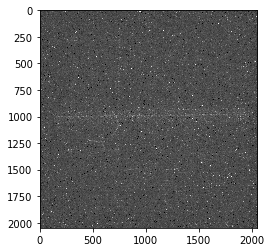

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image, cmap="gray", vmin=85,vmax=140)

In [54]:
cy.swift_auth_listdir("run908")

['Data/LAB/Data_Camera/H5/Run908/run908-0000.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0001.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0002.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0003.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0004.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0005.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0006.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0007.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0008.h5',
 'Data/LAB/Data_Camera/H5/Run908/run908-0009.h5']

In [10]:
swift.get_container("Cygnus", full_listing=True)[1]

[{'hash': 'd41d8cd98f00b204e9800998ecf8427e',
  'last_modified': '2018-07-18T12:55:00.230180',
  'bytes': 0,
  'name': 'Data',
  'content_type': 'application/directory'},
 {'hash': 'd41d8cd98f00b204e9800998ecf8427e',
  'last_modified': '2018-12-23T08:54:16.516430',
  'bytes': 0,
  'name': 'Data/BTF',
  'content_type': 'application/directory'},
 {'hash': 'd41d8cd98f00b204e9800998ecf8427e',
  'last_modified': '2018-12-23T08:55:07.705410',
  'bytes': 0,
  'name': 'Data/BTF/Data_Camera',
  'content_type': 'application/directory'},
 {'hash': 'd41d8cd98f00b204e9800998ecf8427e',
  'last_modified': '2018-12-23T08:55:27.857470',
  'bytes': 0,
  'name': 'Data/BTF/Data_Camera/H5',
  'content_type': 'application/directory'},
 {'hash': 'd41d8cd98f00b204e9800998ecf8427e',
  'last_modified': '2019-01-25T13:27:04.970970',
  'bytes': 0,
  'name': 'Data/BTF/Data_Camera/H5/Run026',
  'content_type': 'application/directory'},
 {'hash': 'b8c6611a375bbf086d08f878f8d5e34a',
  'last_modified': '2019-01-25T13: